In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
data=pd.read_csv('/content/drive/MyDrive/DIABpart2unc.csv')

# Exploratory Data Analysis

In [71]:
# Handle duplicates
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [72]:
data = data.drop_duplicates()

In [73]:
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [74]:
# Remove Unneccessary value [0.00195%]
data = data[data['gender'] != 'Other']

In [75]:
# Initialize the LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit and transform the text column
data['smoking_history'] = label_binarizer.fit_transform(data['smoking_history'])

In [76]:
data.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,0,27.32,6.6,85,0
6,0,44.0,0,0,0,19.31,6.5,200,1
7,0,79.0,0,0,1,23.86,5.7,85,0
8,1,42.0,0,0,0,33.64,4.8,145,0
9,0,32.0,0,0,0,27.32,5.0,100,0


In [77]:
data.tail(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99974,0,51.0,0,0,0,29.16,6.6,145,0
99976,1,13.0,0,0,0,21.01,4.8,140,0
99977,0,22.0,0,0,1,24.46,6.2,160,0
99978,1,14.0,0,0,0,23.67,5.8,145,0
99979,0,61.0,0,0,0,30.11,6.2,240,1
99981,1,26.0,0,0,1,24.08,5.8,90,0
99982,0,80.0,0,0,0,30.04,6.0,126,0
99983,0,21.0,0,0,1,27.32,5.7,126,0
99984,1,80.0,1,0,1,20.96,6.6,85,0
99986,0,63.0,0,0,0,29.01,4.8,145,0


In [78]:
data.shape

(96128, 9)

In [79]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [80]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [81]:
data.nunique()

gender                    2
age                     102
hypertension              2
heart_disease             2
smoking_history           2
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [82]:
data.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99994,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [83]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Statistics

In [84]:
data.describe()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,0.342054,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,0.474400,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,1.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [85]:
data.corr()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257297,0.238449,-0.294216,0.344779,0.106708,0.114323,0.264918
hypertension,0.257297,1.000000,0.119972,-0.111547,0.148124,0.081443,0.084841,0.195696
heart_disease,0.238449,0.119972,1.000000,-0.048199,0.061382,0.068142,0.070838,0.170701
smoking_history,-0.294216,-0.111547,-0.048199,1.000000,-0.229381,-0.044113,-0.049969,-0.112589
bmi,0.344779,0.148124,0.061382,-0.229381,1.000000,0.084443,0.092593,0.214951
HbA1c_level,0.106708,0.081443,0.068142,-0.044113,0.084443,1.000000,0.171717,0.406446
blood_glucose_level,0.114323,0.084841,0.070838,-0.049969,0.092593,0.171717,1.000000,0.424366
diabetes,0.264918,0.195696,0.170701,-0.112589,0.214951,0.406446,0.424366,1.000000


# HEATMAP

<Axes: >

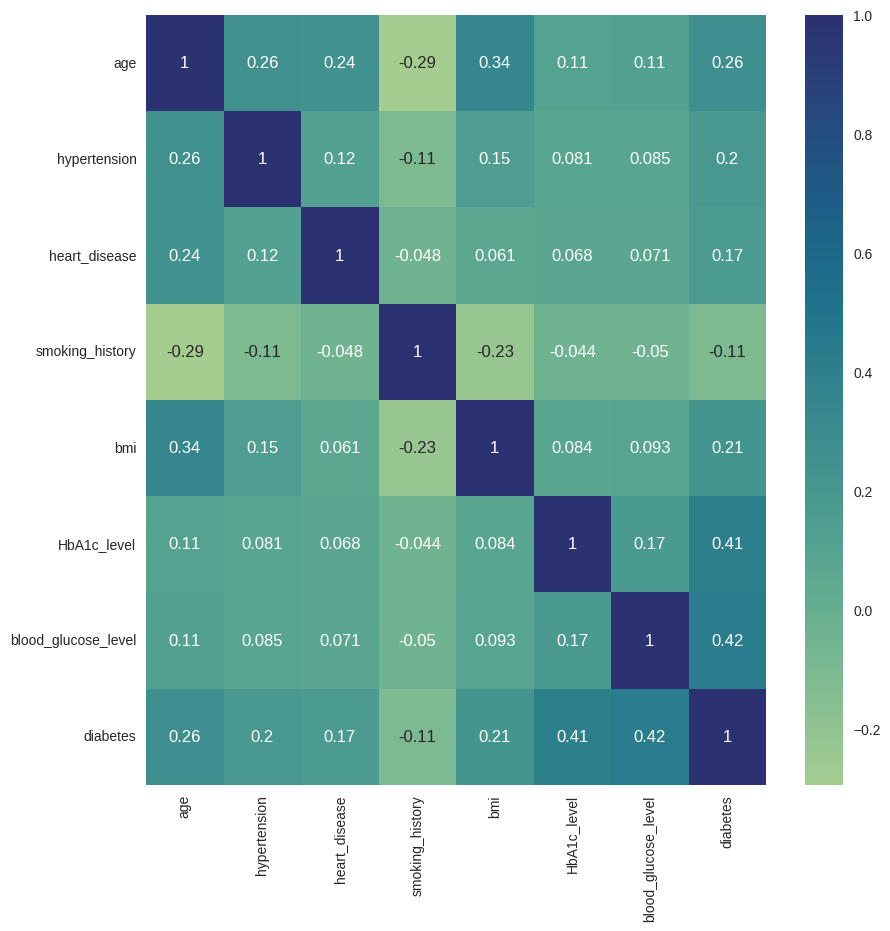

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), annot=True, cmap='crest')

In [87]:
sns.pairplot(data,height=10)

<Axes: ylabel='Frequency'>

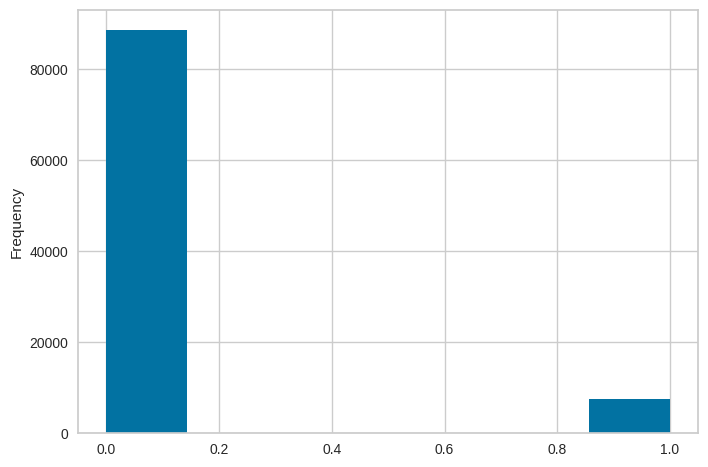

In [88]:
#Histogram
data['hypertension'].plot(kind= 'hist',bins=7)

<Axes: ylabel='Frequency'>

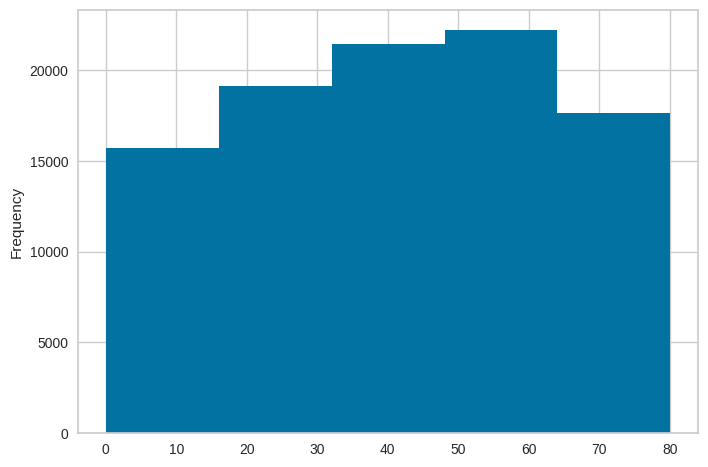

In [89]:
#Histogram
data['age'].plot(kind='hist',bins=5)

<Axes: ylabel='Frequency'>

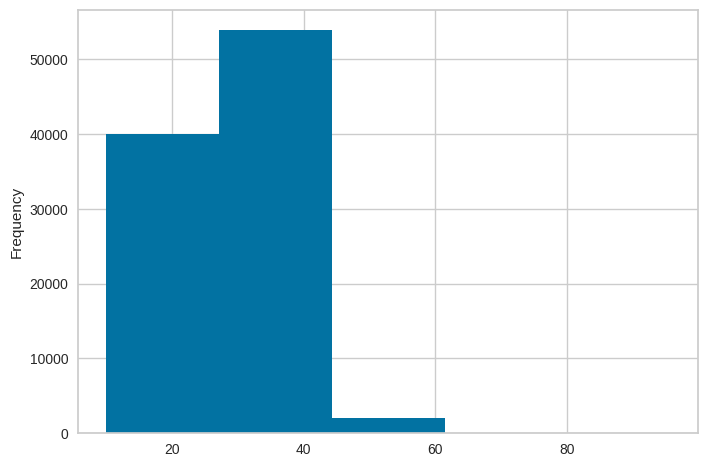

In [90]:
#Histogram
data['bmi'].plot(kind='hist',bins=5)

In [91]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: >

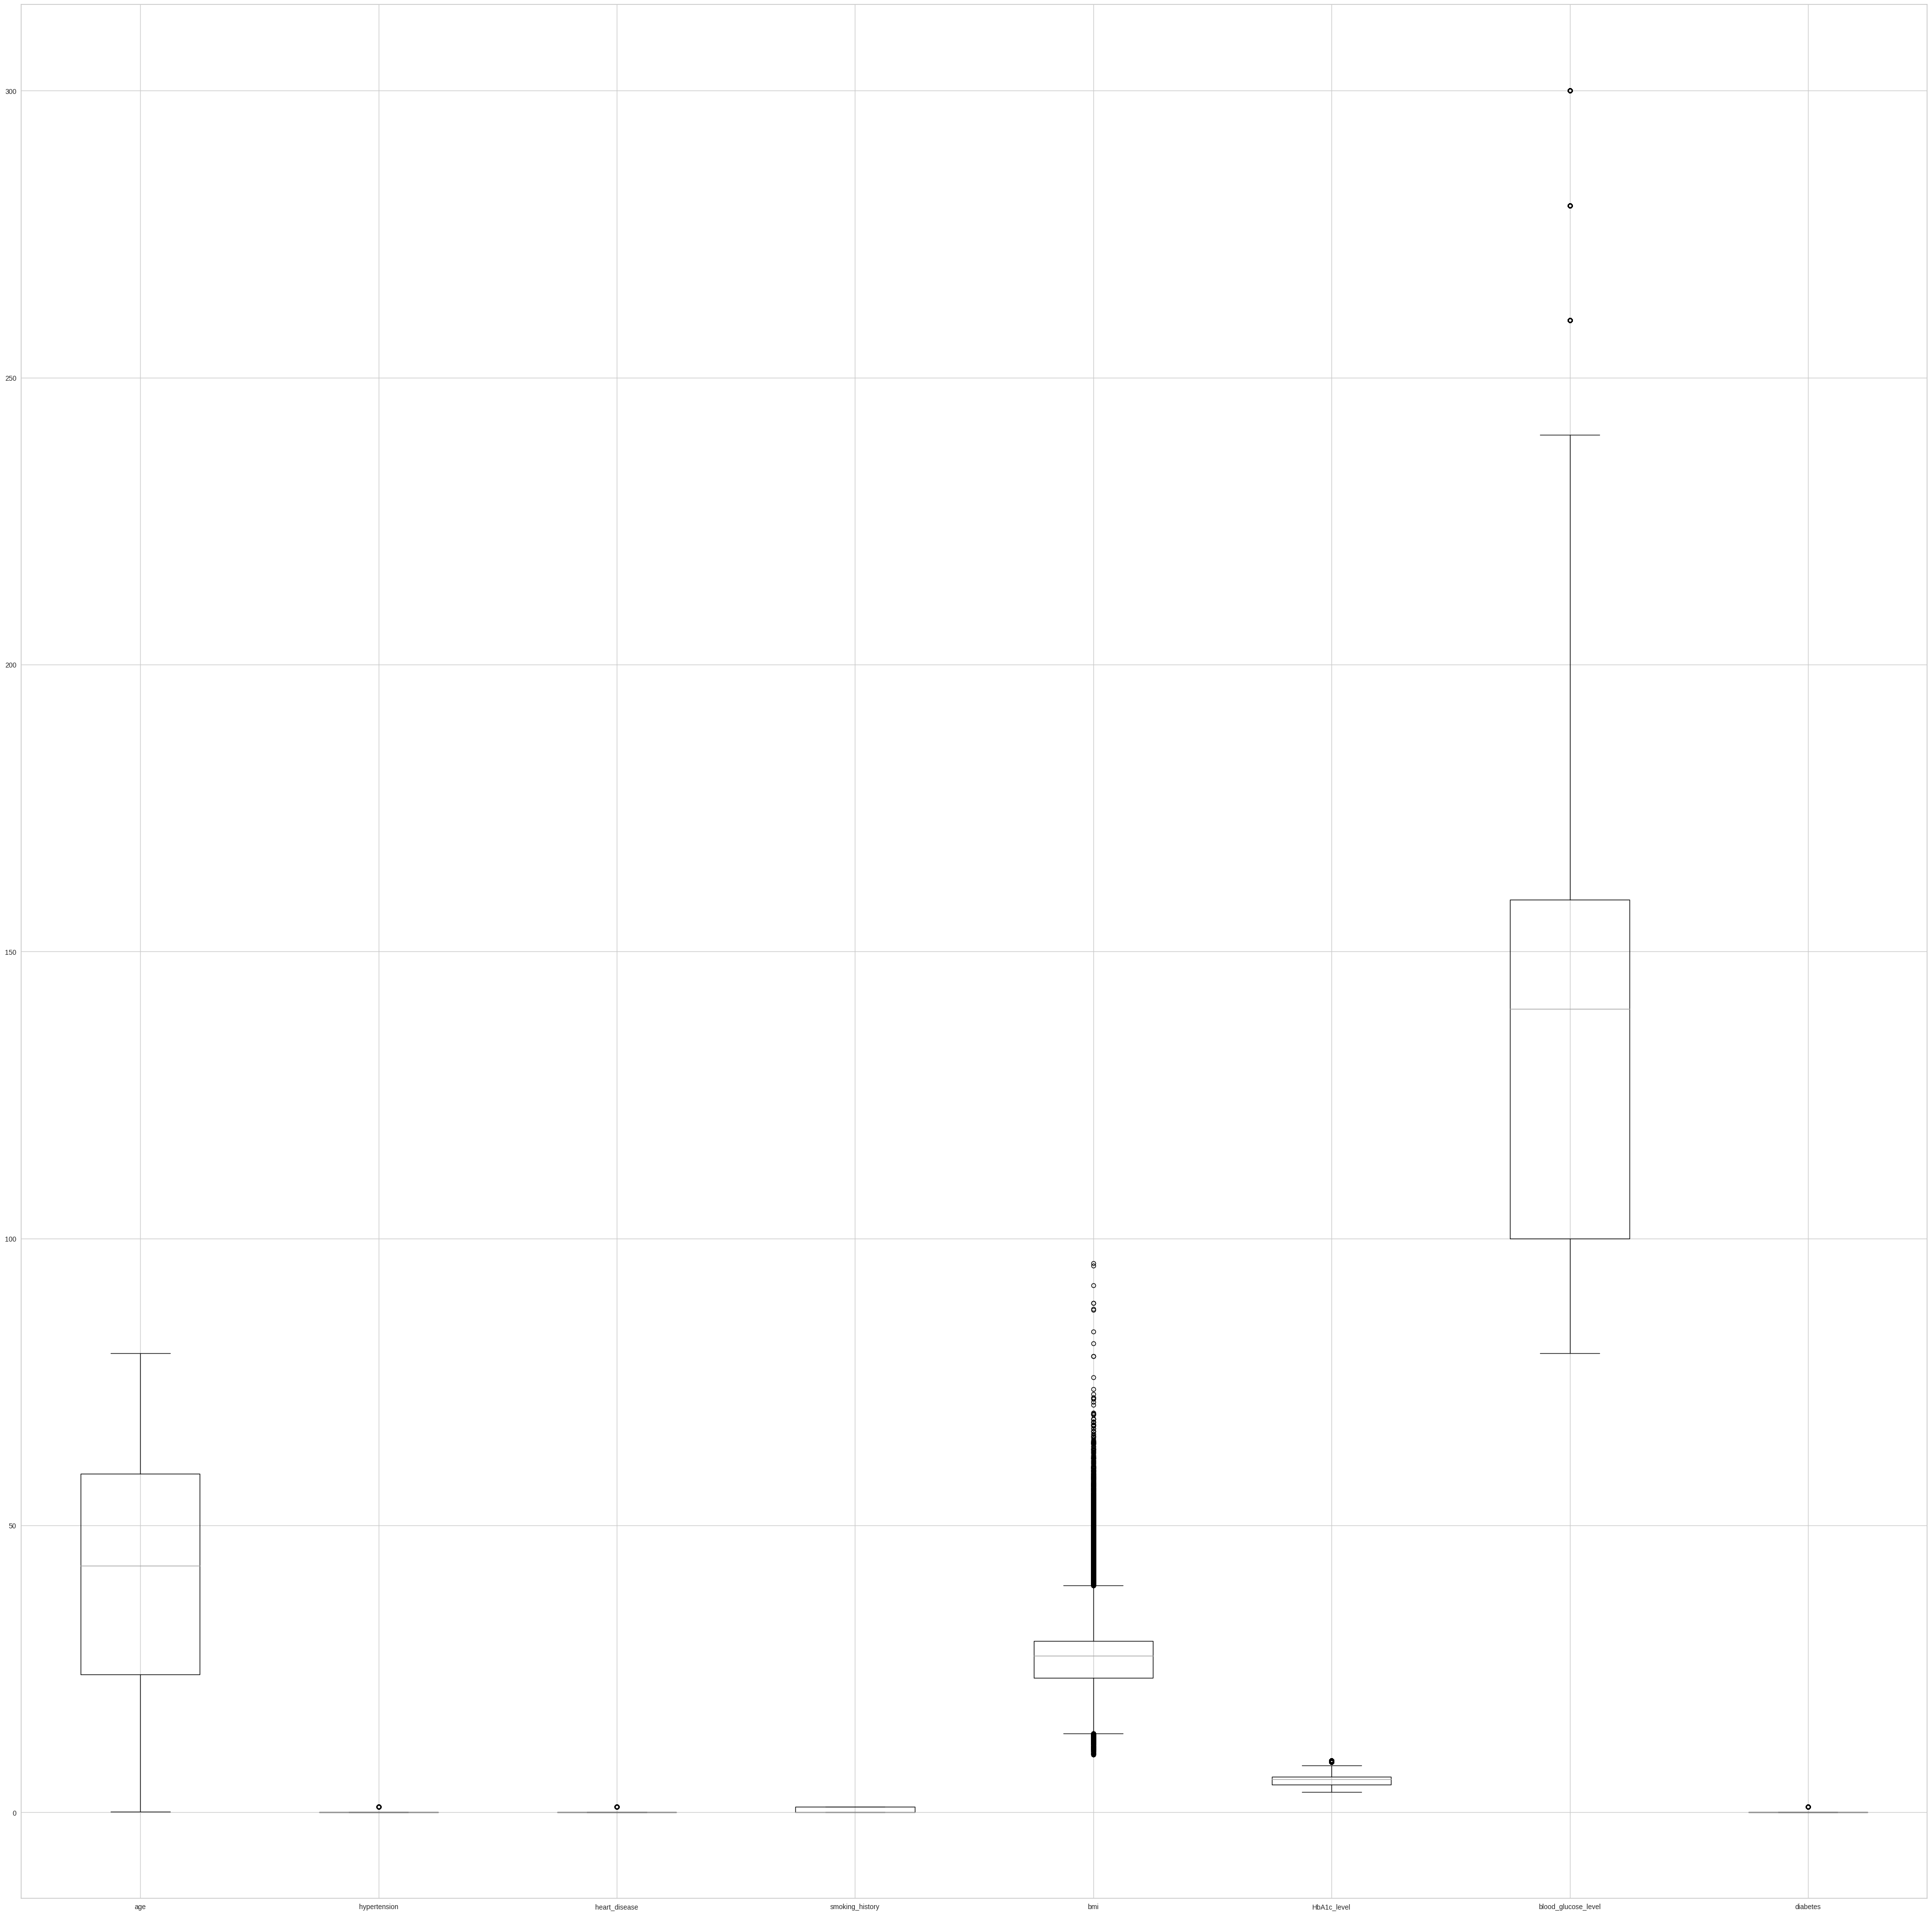

In [92]:
#Plot a Boxplot
plt.figure(figsize=(50,50))
data.boxplot()

# Removing Outliers using percentile method

In [93]:
data.shape

(96128, 9)

In [94]:
data.describe()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,0.342054,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,0.474400,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,1.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


# Max_threshold

In [95]:
max_threshold=data.bmi.quantile(0.80)

In [96]:
max_threshold

31.32

In [97]:
data[data.bmi>max_threshold]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
8,1,42.0,0,0,0,33.64,4.8,145,0
11,0,54.0,0,0,0,54.70,6.0,100,0
12,0,78.0,0,0,0,36.05,5.0,130,0
20,1,40.0,0,0,0,36.38,6.0,90,0
25,1,30.0,0,0,0,33.76,6.1,126,0
...,...,...,...,...,...,...,...,...,...
99970,1,32.0,0,0,0,37.71,6.1,126,0
99971,0,57.0,0,0,0,31.78,5.0,126,0
99992,0,26.0,0,0,0,34.34,6.5,160,0
99993,0,40.0,0,0,0,40.69,3.5,155,0


In [98]:
data=data[data.bmi<max_threshold]

In [99]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99991,1,22.0,0,0,0,29.65,6.0,80,0
99994,0,36.0,0,0,1,24.60,4.8,145,0
99996,0,2.0,0,0,1,17.37,6.5,100,0
99997,1,66.0,0,0,0,27.83,5.7,155,0


In [100]:
data.shape

(76885, 9)

In [101]:
data.diabetes.value_counts()

0    72091
1     4794
Name: diabetes, dtype: int64

# Machine Learning 

In [102]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,0,27.32,6.6,85,0
6,0,44.0,0,0,0,19.31,6.5,200,1
7,0,79.0,0,0,1,23.86,5.7,85,0
9,0,32.0,0,0,0,27.32,5.0,100,0
10,0,53.0,0,0,0,27.32,6.1,85,0


In [103]:
x = np.array(data.drop(['diabetes'], axis=1))
# x=np.array(data.drop('SkinThickness',axis=1))

y=np.array(data.diabetes)
#if axis =1 , drop a column
#if axis =0 , drop a row 

In [104]:
x.shape

(76885, 8)

# Splitting the Data

In [105]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.25,random_state =12)
# random state:- parameter for arranging the columns , or mixing the columns . 

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()

In [108]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [109]:
x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

In [110]:
len(x_train)

57663

In [111]:
len(y_train)

57663

In [112]:
len(x_test)

19222

In [113]:
len(y_test)

19222

# Bagging

In [114]:
from sklearn.ensemble import BaggingClassifier

In [115]:
# bag_model2 = BaggingClassifier(
#     estimator=LogisticRegression(max_iter=10000), 
#     n_estimators=100, 
#     max_samples=0.8, 
#     oob_score=True,
#     random_state=0
# )
# bag_model2.fit(x_train, y_train)
# bag_model2.oob_score_

In [116]:
# bag_model2.score(x_test, y_test)

# PYCARET library

In [117]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import pycaret

In [119]:
from pycaret.datasets import get_data

In [120]:
from pycaret.classification import *
exp = setup(data=data, target='diabetes',train_size=0.75, session_id=123)

,Description,Value
0,Session id,123
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(76885, 9)"
4,Transformed data shape,"(76885, 9)"
5,Transformed train set shape,"(57663, 9)"
6,Transformed test set shape,"(19222, 9)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,1


In [121]:
best_model = compare_models(fold=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9793,0.9777,0.6698,0.9972,0.8012,0.7907,0.8082,0.6400
ada,Ada Boost Classifier,0.9792,0.9778,0.6734,0.9886,0.8010,0.7904,0.8067,0.8875
lightgbm,Light Gradient Boosting Machine,0.9790,0.9761,0.6734,0.9846,0.7996,0.7890,0.8049,0.5900
xgboost,Extreme Gradient Boosting,0.9785,0.9744,0.6768,0.9682,0.7965,0.7856,0.7997,0.3150
rf,Random Forest Classifier,0.9770,0.9524,0.6729,0.9412,0.7845,0.7727,0.7850,1.6950
et,Extra Trees Classifier,0.9743,0.9376,0.6659,0.8950,0.7634,0.7501,0.7594,1.7975
lr,Logistic Regression,0.9694,0.9599,0.5878,0.8816,0.7052,0.6897,0.7056,1.6350
knn,K Neighbors Classifier,0.9658,0.8606,0.5079,0.9012,0.6491,0.6326,0.6617,1.7125
lda,Linear Discriminant Analysis,0.9646,0.9515,0.5516,0.8229,0.6604,0.6425,0.6569,0.3450
dt,Decision Tree Classifier,0.9605,0.8467,0.7149,0.6723,0.6929,0.6718,0.6722,0.4575


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [122]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [123]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9804,0.9699,0.6861,1.0000,0.8138,0.8039,0.8198
1,0.9832,0.9740,0.7306,1.0000,0.8443,0.8356,0.8472
2,0.9778,0.9688,0.6444,1.0000,0.7838,0.7727,0.7934
3,0.9785,0.9681,0.6546,1.0000,0.7912,0.7804,0.8000
4,0.9781,0.9730,0.6490,1.0000,0.7872,0.7762,0.7964
5,0.9790,0.9754,0.6630,1.0000,0.7973,0.7867,0.8053
6,0.9778,0.9744,0.6435,1.0000,0.7831,0.7719,0.7928
7,0.9795,0.9653,0.6713,1.0000,0.8033,0.7930,0.8105
8,0.9809,0.9673,0.6944,1.0000,0.8197,0.8099,0.8250


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [124]:
predictions = predict_model(tuned_model, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9794,0.9789,0.6700,0.9994,0.8022,0.7918,0.8094


In [125]:
predictions

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,prediction_label,prediction_score
0,0,80.0,0,1,0,25.190001,6.6,140,0,0,0.8246
1,0,54.0,0,0,1,27.320000,6.6,80,0,0,0.9989
2,1,28.0,0,0,0,27.320000,5.7,158,0,0,0.9953
3,0,36.0,0,0,0,23.450001,5.0,155,0,0,0.9991
4,1,76.0,1,1,0,20.139999,4.8,155,0,0,0.9968
...,...,...,...,...,...,...,...,...,...,...,...
99991,1,22.0,0,0,0,29.650000,6.0,80,0,0,0.9990
99994,0,36.0,0,0,1,24.600000,4.8,145,0,0,0.9991
99996,0,2.0,0,0,1,17.370001,6.5,100,0,0,0.9993
99997,1,66.0,0,0,0,27.830000,5.7,155,0,0,0.8472


In [126]:
# save the model
from pycaret import classification
classification.save_model(tuned_model, 'Best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'hypertension',
                                              'heart_disease', 'smoking_history',
                                              'bmi', 'HbA1c_level',
                                              'blood_glucose_level'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               v...
           

In [127]:
# load model
Best_model = classification.load_model(model_name='Best')

Transformation Pipeline and Model Successfully Loaded


In [128]:
predictions = predict_model(Best_model, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9794,0.9789,0.6700,0.9994,0.8022,0.7918,0.8094


In [129]:
predicted_labels = predictions['prediction_label']
true_labels = predictions['diabetes']


In [130]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy = accuracy_score(true_labels, predicted_labels)

In [132]:
accuracy

0.9793978019119464

#Fiiting the tuned model 

In [133]:
tuned_model.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [134]:
tuned_model.score(x_test,y_test)

0.9803350327749454